# Importing Modules

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
data = pd.read_csv('../data/heart_failure_clinical_records_dataset.csv')

# Univariate Analysis

In [14]:
print(data.shape)
data.head()

(299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [16]:
data.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
66,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
213,48.0,1,131,1,30,1,244000.0,1.6,130,0,0,193,1
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14,1
94,58.0,0,144,1,38,1,327000.0,0.7,142,0,0,83,0
175,60.0,1,95,0,60,0,337000.0,1.0,138,1,1,146,0


## Handling Types of Features

In [17]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [18]:
categorical_features = {"anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT"}
for feature in categorical_features:
    data[feature] = data[feature].astype("category")

In [19]:
data.dtypes

age                          float64
anaemia                     category
creatinine_phosphokinase       int64
diabetes                    category
ejection_fraction              int64
high_blood_pressure         category
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                     category
time                           int64
DEATH_EVENT                 category
dtype: object

In [20]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns
numerical_features

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')

# Missing Data

In [21]:
# we'll learn how to handle missing data in the next lecture, for now, the dataset does not have it
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


# Duplicates

In [22]:
# we'll learn how to handle duplicates in the next lecture, for now, the dataset does not have them
data[data.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


# Distributions

In [23]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [24]:
data.describe(include="all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.0,299.000000,299.0,299.000000,299.0,299.000000,299.00000,299.000000,299.0,299.0,299.000000,299.0
unique,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,2.0,NaN,2.0
top,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,1.0,0.0,NaN,0.0
freq,NaN,170.0,NaN,174.0,NaN,194.0,NaN,NaN,NaN,194.0,203.0,NaN,203.0
mean,60.833893,NaN,581.839465,NaN,38.083612,NaN,263358.029264,1.39388,136.625418,NaN,NaN,130.260870,NaN
std,11.894809,NaN,970.287881,NaN,11.834841,NaN,97804.236869,1.03451,4.412477,NaN,NaN,77.614208,NaN
min,40.000000,NaN,23.000000,NaN,14.000000,NaN,25100.000000,0.50000,113.000000,NaN,NaN,4.000000,NaN
25%,51.000000,NaN,116.500000,NaN,30.000000,NaN,212500.000000,0.90000,134.000000,NaN,NaN,73.000000,NaN
50%,60.000000,NaN,250.000000,NaN,38.000000,NaN,262000.000000,1.10000,137.000000,NaN,NaN,115.000000,NaN
75%,70.000000,NaN,582.000000,NaN,45.000000,NaN,303500.000000,1.40000,140.000000,NaN,NaN,203.000000,NaN


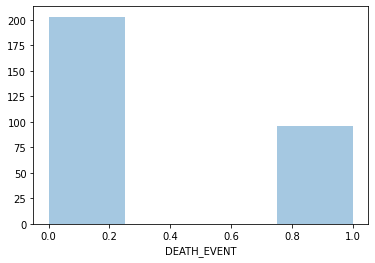

In [25]:
sns.distplot(data['DEATH_EVENT'], kde=False);

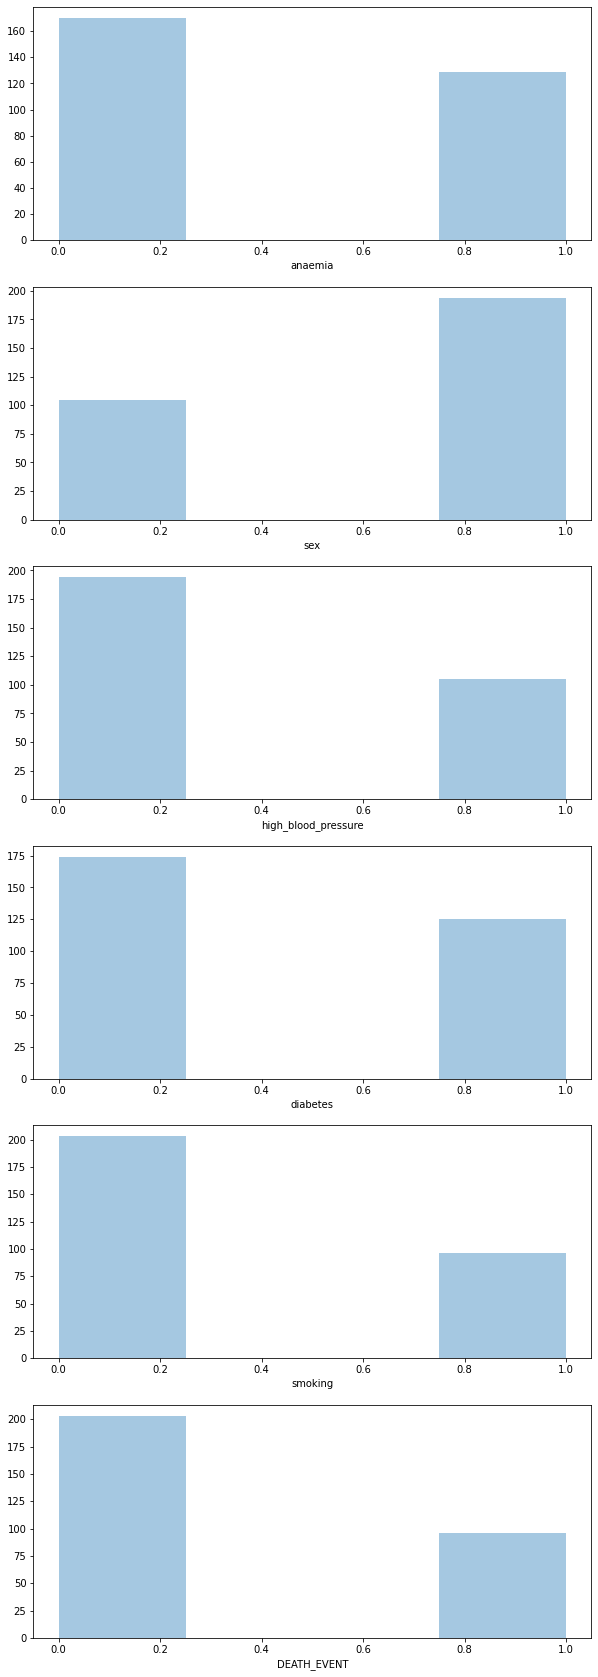

In [26]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(10, 30)
for i, col in enumerate(categorical_features):
    sns.distplot(data[col], kde=False, ax=axes[i])
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'ejection_fraction'}>],
       [<AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'serum_sodium'}>],
       [<AxesSubplot:title={'center':'time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

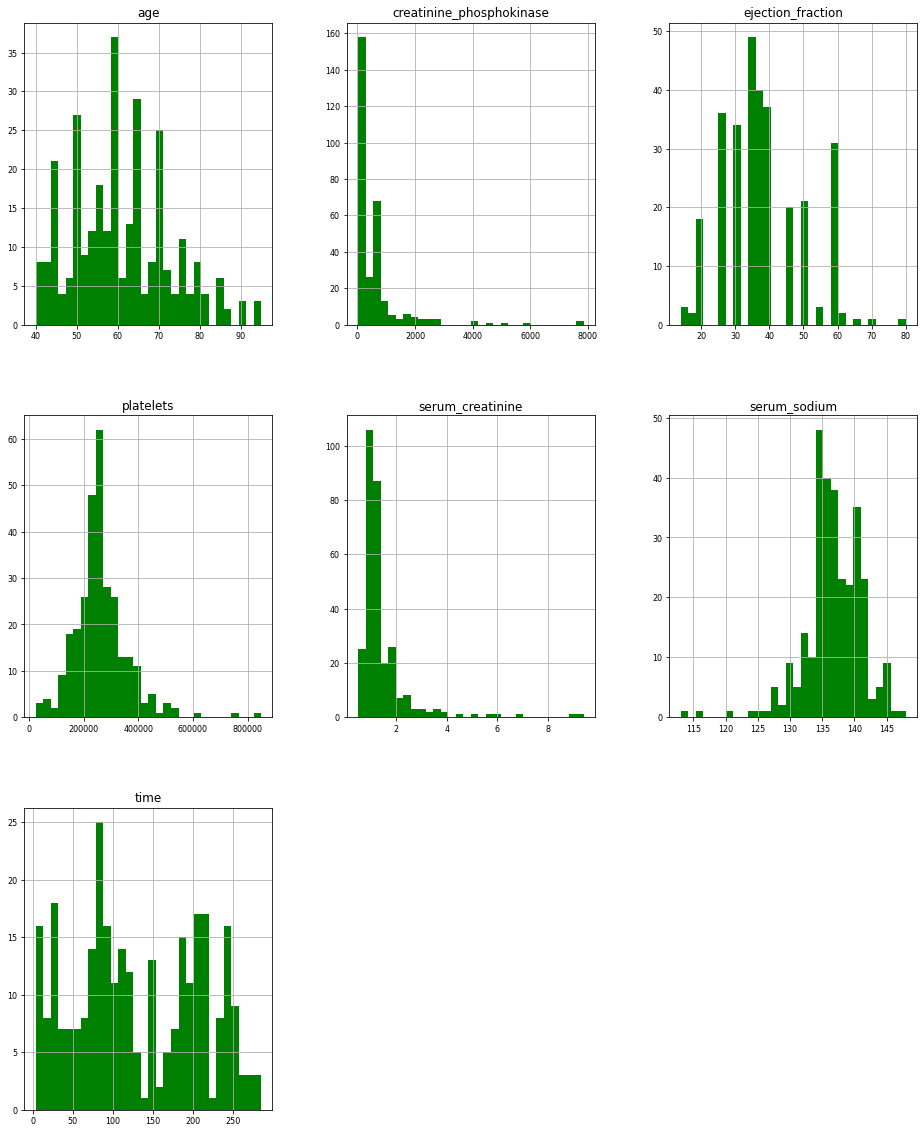

In [29]:
data[numerical_features].hist(figsize=(16, 20), color = 'g', bins=30, xlabelsize=8, ylabelsize=8)

In [30]:
data.median()

age                             60.0
anaemia                          0.0
creatinine_phosphokinase       250.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure              0.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
time                           115.0
DEATH_EVENT                      0.0
dtype: float64

In [31]:
data.mean()

age                             60.833893
anaemia                          0.431438
creatinine_phosphokinase       581.839465
diabetes                         0.418060
ejection_fraction               38.083612
high_blood_pressure              0.351171
platelets                   263358.029264
serum_creatinine                 1.393880
serum_sodium                   136.625418
sex                              0.648829
smoking                          0.321070
time                           130.260870
DEATH_EVENT                      0.321070
dtype: float64

# Outliers

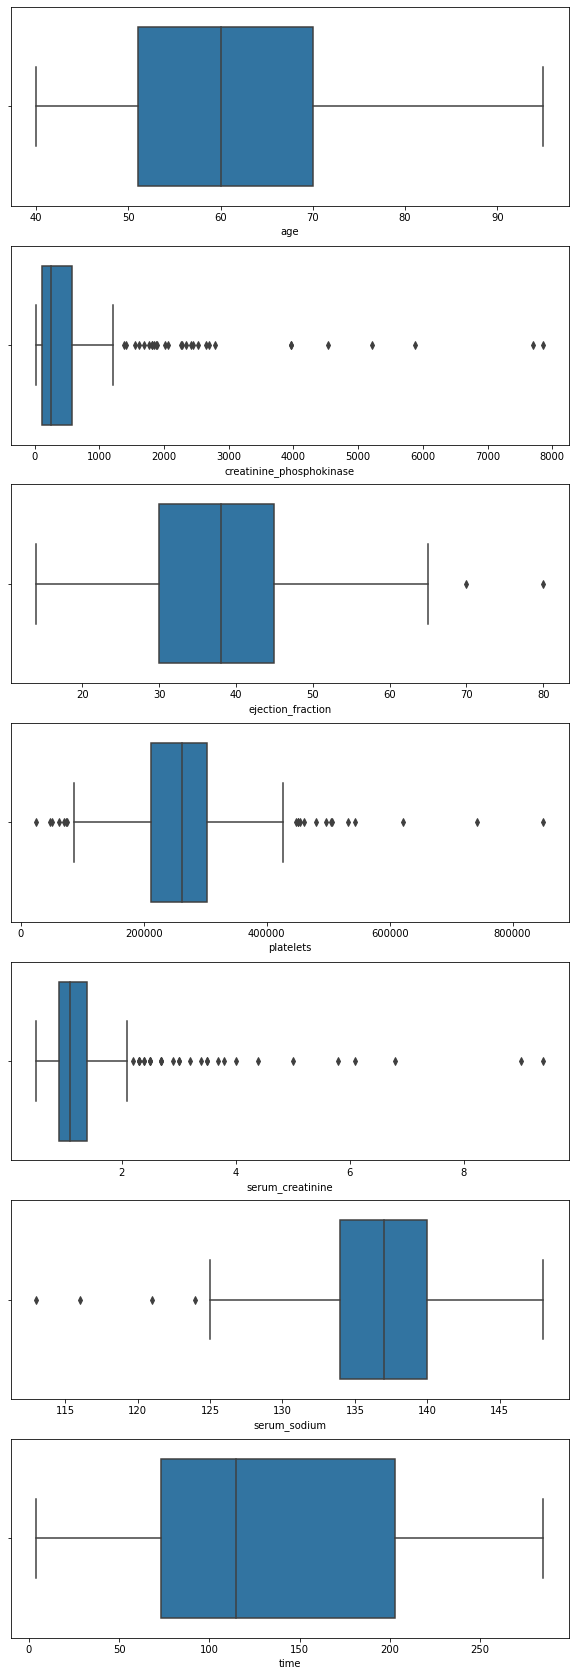

In [32]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10, 30)
for i, col in enumerate(numerical_features):
    sns.boxplot(data[col], ax=axes[i])
plt.show()

# Linear Relationship

## Scaterplot

/Users/roman/.pyenv/versions/3.7.3/envs/iasa_kpi_ml_course/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


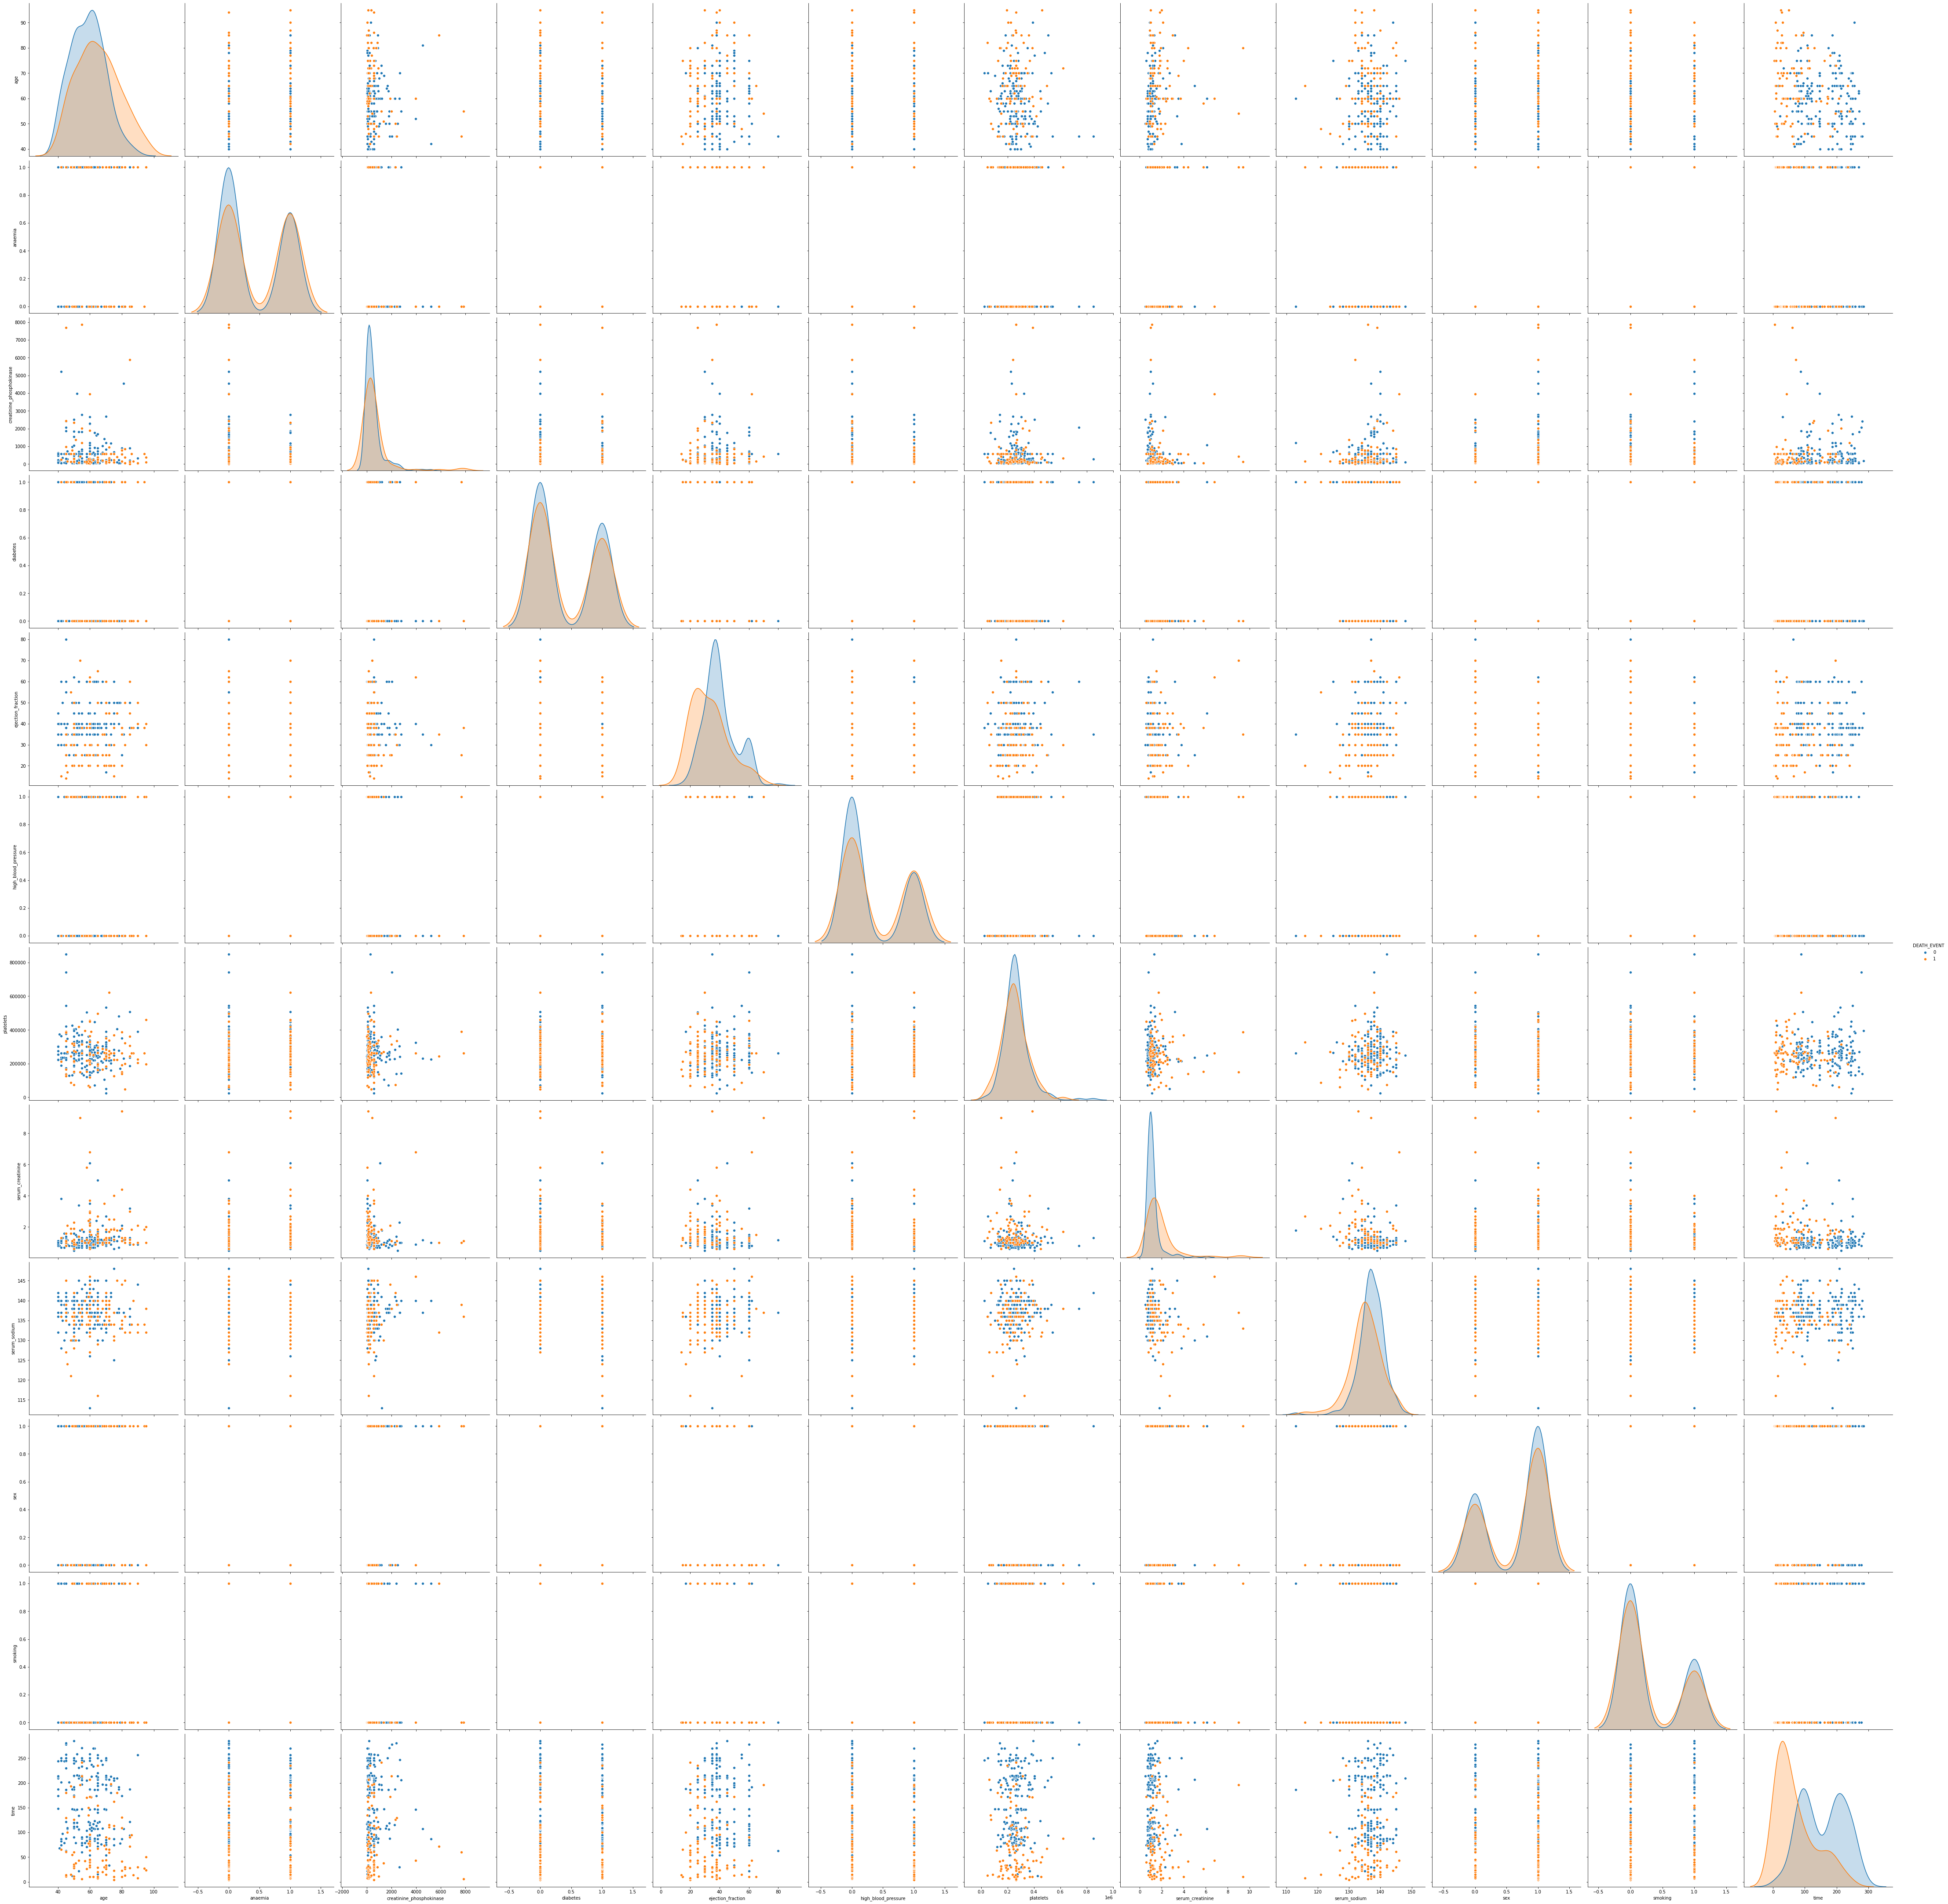

In [33]:
sns.pairplot(data, hue="DEATH_EVENT", size=5)

## Correlation Matrix

<AxesSubplot:>

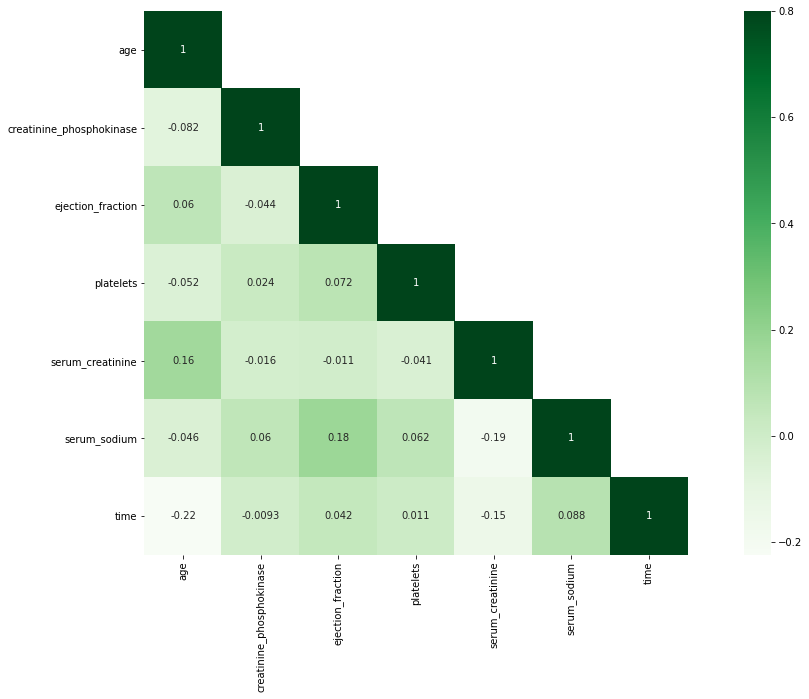

In [34]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

# Scikit learn linear regression on numerical features only

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [35]:
train_features = data[numerical_features]
train_features

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [38]:
train_x, test_x, train_y, test_y = train_test_split(train_features, data["DEATH_EVENT"], test_size=0.2)
print(f"Train: {train_x.shape}, {train_y.shape}")
print(f"Test: {test_x.shape}, {test_y.shape}")

Train: (239, 7), (239,)
Test: (60, 7), (60,)


In [39]:
sc = StandardScaler()
scaled_train_x = sc.fit_transform(train_x)
scaled_train_x

array([[-1.01856299, -0.4772152 , -0.72523154, ...,  0.18423571,
        -1.42806693,  0.78765943],
       [-0.44512866, -0.42218588,  0.55301579, ..., -0.20096697,
         0.12737316,  1.01900448],
       [-0.85472461, -0.08302561, -0.72523154, ..., -0.45776876,
        -0.98365547, -0.29195078],
       ...,
       [-0.03553271, -0.33571124, -0.72523154, ..., -0.36605383,
         0.12737316,  1.45598957],
       [ 0.7836592 , -0.43229331,  1.83126312, ..., -0.27433891,
         1.90501896,  0.18359181],
       [ 0.7836592 , -0.54684413,  0.12693335, ...,  0.27595064,
        -0.09483257, -0.72893587]])

In [40]:
scaled_test_x = sc.transform(test_x)

In [41]:
lr = LogisticRegression()
lr.fit(scaled_train_x, train_y)

LogisticRegression()

In [42]:
train_preds = lr.predict(scaled_train_x)
print(f"Train Accuracy: {accuracy_score(train_y, train_preds)}")

Train Accuracy: 0.8410041841004184


In [43]:
test_preds = lr.predict(scaled_test_x)
print(f"Test Accuracy: {accuracy_score(test_y, test_preds)}")

Test Accuracy: 0.8


In [44]:
print(f"Intercept: {lr.intercept_}")
for feature_name, coef in zip(numerical_features, lr.coef_[0]):
    print(f"{feature_name}: {coef}")

Intercept: [-1.26817086]
age: 0.538578342847957
creatinine_phosphokinase: 0.2663181417959163
ejection_fraction: -0.9848945009558102
platelets: -0.12442877377998587
serum_creatinine: 0.8077691938657192
serum_sodium: -0.3861741072794177
time: -1.5227965196409787


In [ ]:
# Optional: do crossvalidation instead of train_test_split, which is a better strategy for such a small dataset